<a href="https://colab.research.google.com/github/diaszakir/CompMathAssignment4/blob/main/Assignment4_DiasZakir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

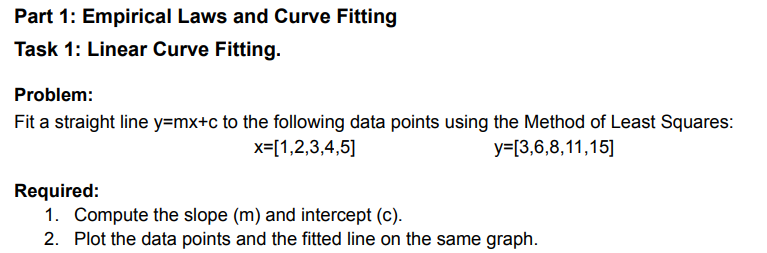

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

slope: 2.9
intercept -0.09999999999999883


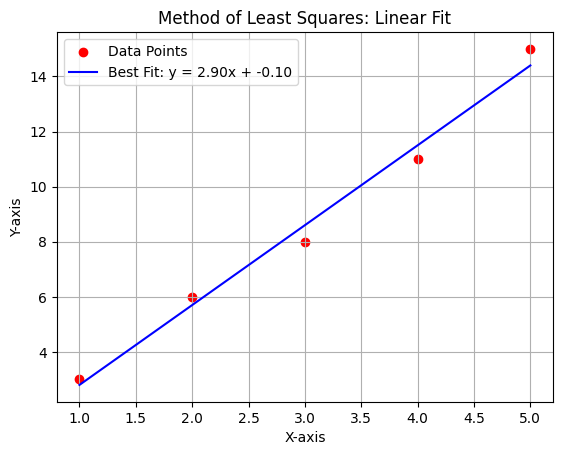

In [ ]:
# Data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 6, 8, 11, 15])

# Fit a straight line (linear regression)
coefficients = np.polyfit(x, y, 1)  # 1 indicates a linear fit
m, c = coefficients

# Line equation: y = mx + c
fit_line = m * x + c

print("slope:",m)
print("intercept",c)
# Plot
plt.scatter(x, y, color='red', label='Data Points')  # Scatter plot for data
plt.plot(x, fit_line, label=f'Best Fit: y = {m:.2f}x + {c:.2f}', color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Method of Least Squares: Linear Fit')
plt.grid()
plt.show()

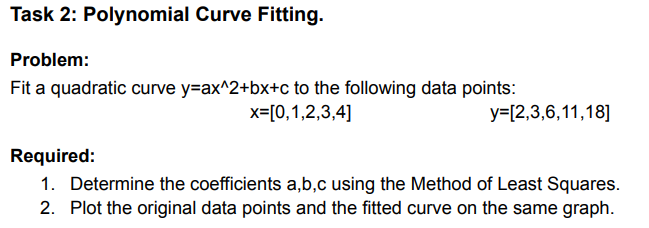

In [ ]:
x = np.array([0, 1, 2, 3, 4])
y = np.array([2, 3, 6, 11, 18])

# Quadratic Fit
coefficients = np.polyfit(x, y, 2)  # 2 indicates a quadratic fit
a, b, c = coefficients

print("a:", a)
print("b:", b)
print("c:", c)

# Parabola equation: y = ax^2 + bx + c
fit_curve = a * x**2 + b * x + c

# Plot
plt.scatter(x, y, color='green', label='Data Points')
plt.plot(x, fit_curve, label=f'Best Fit: y = {a:.2f}x² + {b:.2f}x + {c:.2f}', color='purple')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Method of Least Squares: Quadratic Fit')
plt.grid()
plt.show()

a: 1.0000000000000007
b: -2.5945352296482633e-15
c: 2.0000000000000018


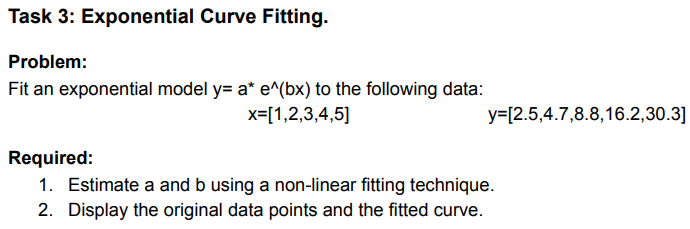

In [ ]:
from scipy.optimize import curve_fit

x = np.array([1, 2, 3, 4, 5])
y = np.array([2.5, 4.7, 8.8, 16.2, 30.3])

# Exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Fit the data
params, _ = curve_fit(exponential_func, x, y)
a, b = params

# Predicted values
fit_curve = exponential_func(x, a, b)

# Output a and b
print("a:",a)
print("b:",b)

# Plot
plt.scatter(x, y, color='orange', label='Data Points')
plt.plot(x, fit_curve, label=f'Best Fit: y = {a:.2f}e^({b:.2f}x)', color='red')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Curve Fitting: Exponential Fit')
plt.grid()
plt.show()


a: 1.3532713738282405
b: 0.6216165166981126


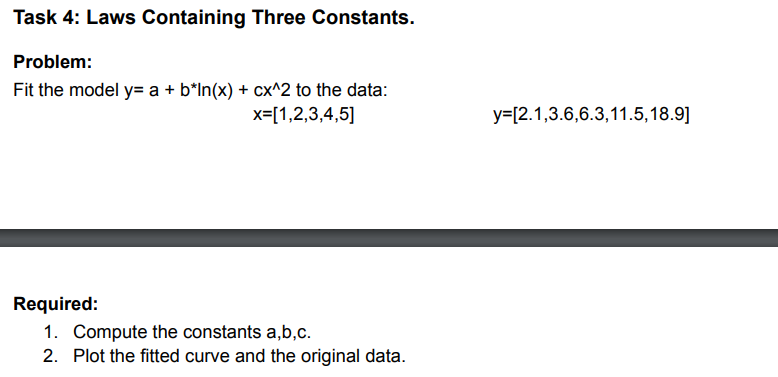

In [ ]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

# Data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([2.1, 3.6, 6.3, 11.5, 18.9])

# Define the model function
def three_const_func(x, a, b, c):
    return a + b * np.log(x) + c * x ** 2

# Provide initial guesses for the parameters (a, b, c)
initial_guesses = [1, 0.5, 1]

# Fit the data with increased maxfev and initial guesses
params, _ = curve_fit(three_const_func, x, y, p0=initial_guesses, maxfev=5000)
a, b, c = params

# Predicted values
fit_curve = three_const_func(x, a, b, c)

print("a:", a)
print("b:", b)
print("c:", c)

# Plot
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, fit_curve, label=f'Best Fit: y = {a:.2f}e^({b:.2f}x) + {c:.2f}', color='green')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('Three Constants Model: Exponential with Offset')
plt.grid()
plt.show()


a: 1.3939644810677383
b: -2.206457308208163
c: 0.8362467951957903


image.png

In [ ]:
import numpy as np
import pandas as pd

# Data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 7, 13, 21])

# Number of data points
n = len(y)

# Initialize the forward difference table
forward_diff = np.zeros((n, n))
forward_diff[:, 0] = y  # First column is y values

# Calculate forward differences
for j in range(1, n):
    for i in range(n - j):
        forward_diff[i, j] = forward_diff[i + 1, j - 1] - forward_diff[i, j - 1]

# Convert to a readable format
df = pd.DataFrame(forward_diff, columns=[f"Δ^{i}y" for i in range(n)])
print("Forward Difference Table:")
print(df)


Forward Difference Table:
   Δ^0y  Δ^1y  Δ^2y  Δ^3y  Δ^4y
0   1.0   2.0   2.0   0.0   0.0
1   3.0   4.0   2.0   0.0   0.0
2   7.0   6.0   2.0   0.0   0.0
3  13.0   8.0   0.0   0.0   0.0
4  21.0   0.0   0.0   0.0   0.0


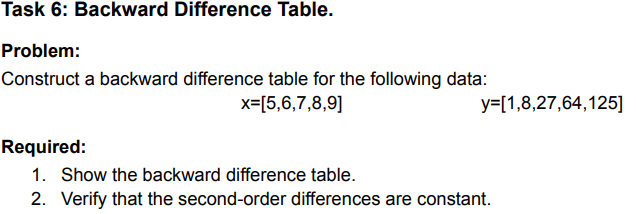

In [ ]:
x = np.array([5, 6, 7, 8, 9])
y = np.array([1, 8, 27, 64, 125])

# Initialize the backward difference table
backward_diff = np.zeros((n, n))
backward_diff[:, 0] = y  # First column is y values

# Calculate backward differences
for j in range(1, n):
    for i in range(j, n):
        backward_diff[i, j] = backward_diff[i, j - 1] - backward_diff[i - 1, j - 1]

# Convert to a readable format
df_backward = pd.DataFrame(backward_diff, columns=[f"∇^{i}y" for i in range(n)])
print("Backward Difference Table:")
print(df_backward)


Backward Difference Table:
    ∇^0y  ∇^1y  ∇^2y  ∇^3y  ∇^4y
0    1.0   0.0   0.0   0.0   0.0
1    8.0   7.0   0.0   0.0   0.0
2   27.0  19.0  12.0   0.0   0.0
3   64.0  37.0  18.0   6.0   0.0
4  125.0  61.0  24.0   6.0   0.0


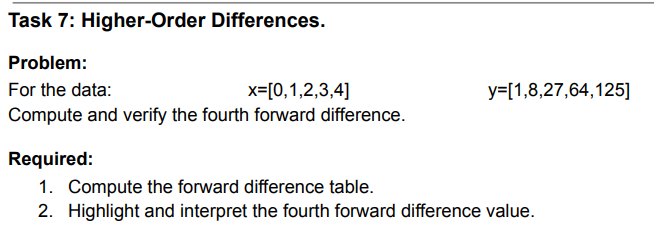

In [ ]:
import numpy as np
import pandas as pd

# Data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 8, 27, 64, 125])

# Number of data points
n = len(y)

# Initialize the forward difference table
forward_diff = np.zeros((n, n))
forward_diff[:, 0] = y  # First column is y values

# Calculate forward differences
for j in range(1, n):
    for i in range(n - j):
        forward_diff[i, j] = forward_diff[i + 1, j - 1] - forward_diff[i, j - 1]

# Convert to a readable format
df = pd.DataFrame(forward_diff, columns=[f"Δ^{i}y" for i in range(n)])
print("Forward Difference Table:")
print(df)


# Extract the fourth forward difference at x = 0
fourth = forward_diff[0, 4]  # fourth column, first row
print(f"The fourth forward difference at x = 0 is: {fourth}")

Forward Difference Table:
    Δ^0y  Δ^1y  Δ^2y  Δ^3y  Δ^4y
0    1.0   7.0  12.0   6.0   0.0
1    8.0  19.0  18.0   6.0   0.0
2   27.0  37.0  24.0   0.0   0.0
3   64.0  61.0   0.0   0.0   0.0
4  125.0   0.0   0.0   0.0   0.0
The fourth forward difference at x = 0 is: 0.0
